In [2]:
import pandas as pd

> _**고려할 점:** 인구수, 노령/유소년 인구수, 주변(반경?) 의료기관 수, 대구 울산 등과의 접근성?_


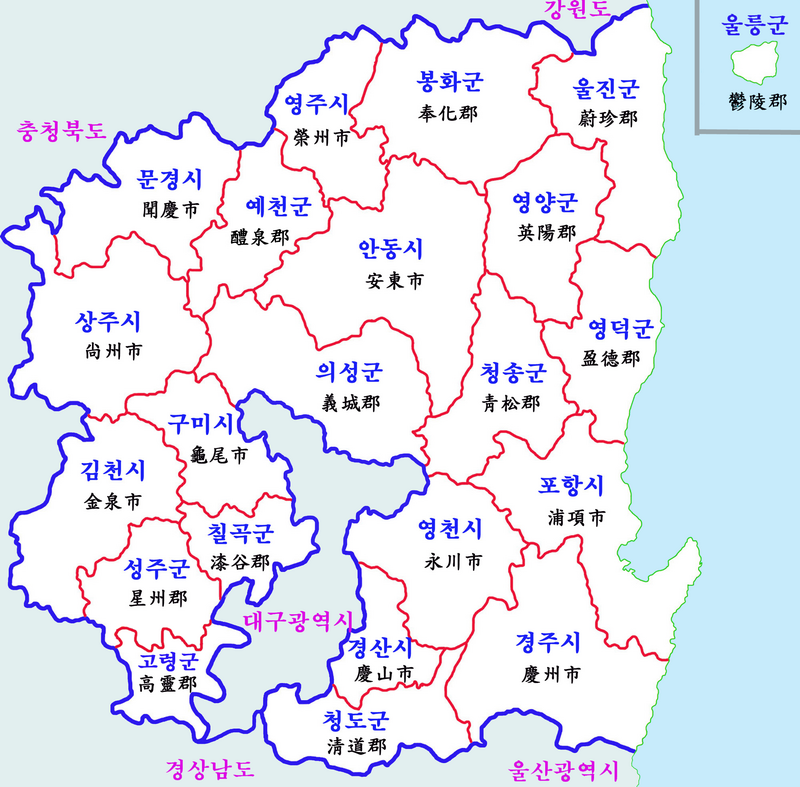

In [10]:
gb_pop = pd.read_csv('행정구역_읍면동_별_5세별_주민등록인구_2011년__20240314151450.csv', header=1)

In [11]:
gb_pop = gb_pop.iloc[:, 1:] # 구역명(1) 빼고 슬라이싱
gb_pop.head()

,행정구역(동읍면)별(2),행정구역(동읍면)별(3),행정구역(동읍면)별(4),항목,계,0 - 4세,5 - 9세,10 - 14세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
0,소계,소계,소계,총인구수 (명),2554324,59519,92407,108925,204308,149037,103909,95612,54388,18784,3883,565
1,소계,소계,소계,남자인구수 (명),1290298,30559,47533,56562,102082,70824,46265,34751,15935,4131,646,54
2,소계,소계,소계,여자인구수 (명),1264026,28960,44874,52363,102226,78213,57644,60861,38453,14653,3237,511
3,포항시,소계,소계,총인구수 (명),493033,12069,20091,23741,39718,26457,16617,12539,6103,2116,439,63
4,포항시,소계,소계,남자인구수 (명),250242,6216,10486,12352,19345,12933,7738,4833,1753,435,59,6


In [16]:
# 구역별 '계'가 아닌 데이터만 떼옴
gb_pop = gb_pop[gb_pop['행정구역(동읍면)별(4)']!='소계']
gb_pop.head()

,행정구역(동읍면)별(2),행정구역(동읍면)별(3),행정구역(동읍면)별(4),항목,계,0 - 4세,5 - 9세,10 - 14세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
9,포항시,남구,구룡포읍,총인구수 (명),6827,32,53,93,980,749,532,552,295,76,15,2
10,포항시,남구,구룡포읍,남자인구수 (명),3454,12,28,45,493,326,210,199,89,16,2,0
11,포항시,남구,구룡포읍,여자인구수 (명),3373,20,25,48,487,423,322,353,206,60,13,2
12,포항시,남구,연일읍,총인구수 (명),29134,491,1187,1668,2115,1319,795,515,299,85,18,2
13,포항시,남구,연일읍,남자인구수 (명),14805,256,623,879,1050,688,397,201,87,18,2,0


##### 인구 분류
---
- 유소년(0-14세), 생산연령(15-64세), 고령(65세 이상)

In [28]:
gb_3pop = gb_pop.loc[:, '행정구역(동읍면)별(2)':'계'].copy()

gb_3pop['0-14'] = gb_pop.loc[:, '0 - 4세':'10 - 14세'].sum(axis=1).copy() # 유소년 인구
gb_3pop['65+'] = gb_pop.loc[:, '65 - 69세':'100+'].sum(axis=1).copy() # 고령 인구

gb_3pop['15-64'] = gb_3pop['계'] - (gb_3pop['0-14'] + gb_3pop['65+']) # 생산연령 인구

gb_3pop.head()

,행정구역(동읍면)별(2),행정구역(동읍면)별(3),행정구역(동읍면)별(4),항목,계,0-14,65+,15-64
9,포항시,남구,구룡포읍,총인구수 (명),6827,178,3201,3448
10,포항시,남구,구룡포읍,남자인구수 (명),3454,85,1335,2034
11,포항시,남구,구룡포읍,여자인구수 (명),3373,93,1866,1414
12,포항시,남구,연일읍,총인구수 (명),29134,3346,5148,20640
13,포항시,남구,연일읍,남자인구수 (명),14805,1758,2443,10604


##### 기존 의료기관 정보를 수집
---
- 병원정보서비스, 시설정보(병상수), 진료과목정보 활용

---

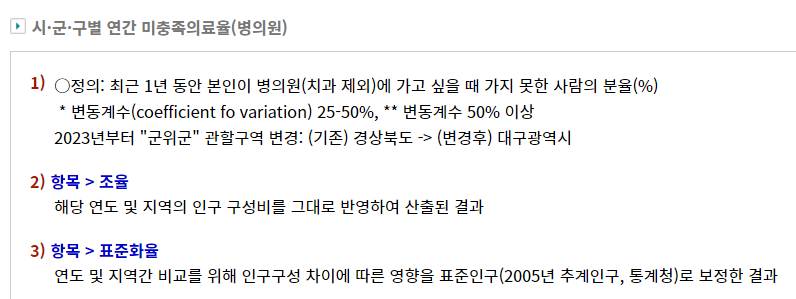